<a href="https://colab.research.google.com/github/aleeasgar0404/Employee_Attrition_Deep/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import tensorflow as tf 
import numpy as np
np.random.seed(42)

In [119]:

from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
employee_df=pd.read_csv('/content/drive/MyDrive/Employee_Attrition_data/Employee-Attrition.csv')

In [122]:
employee_df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [123]:
employee_df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [124]:
employee_df['Attrition']=employee_df['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)
employee_df['OverTime']=employee_df['OverTime'].apply(lambda x : 1 if x=='Yes' else 0)
employee_df['Over18']=employee_df['Over18'].apply(lambda x : 1 if x=='Y' else 0)

**EDA**

In [125]:
employee_df.isna().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

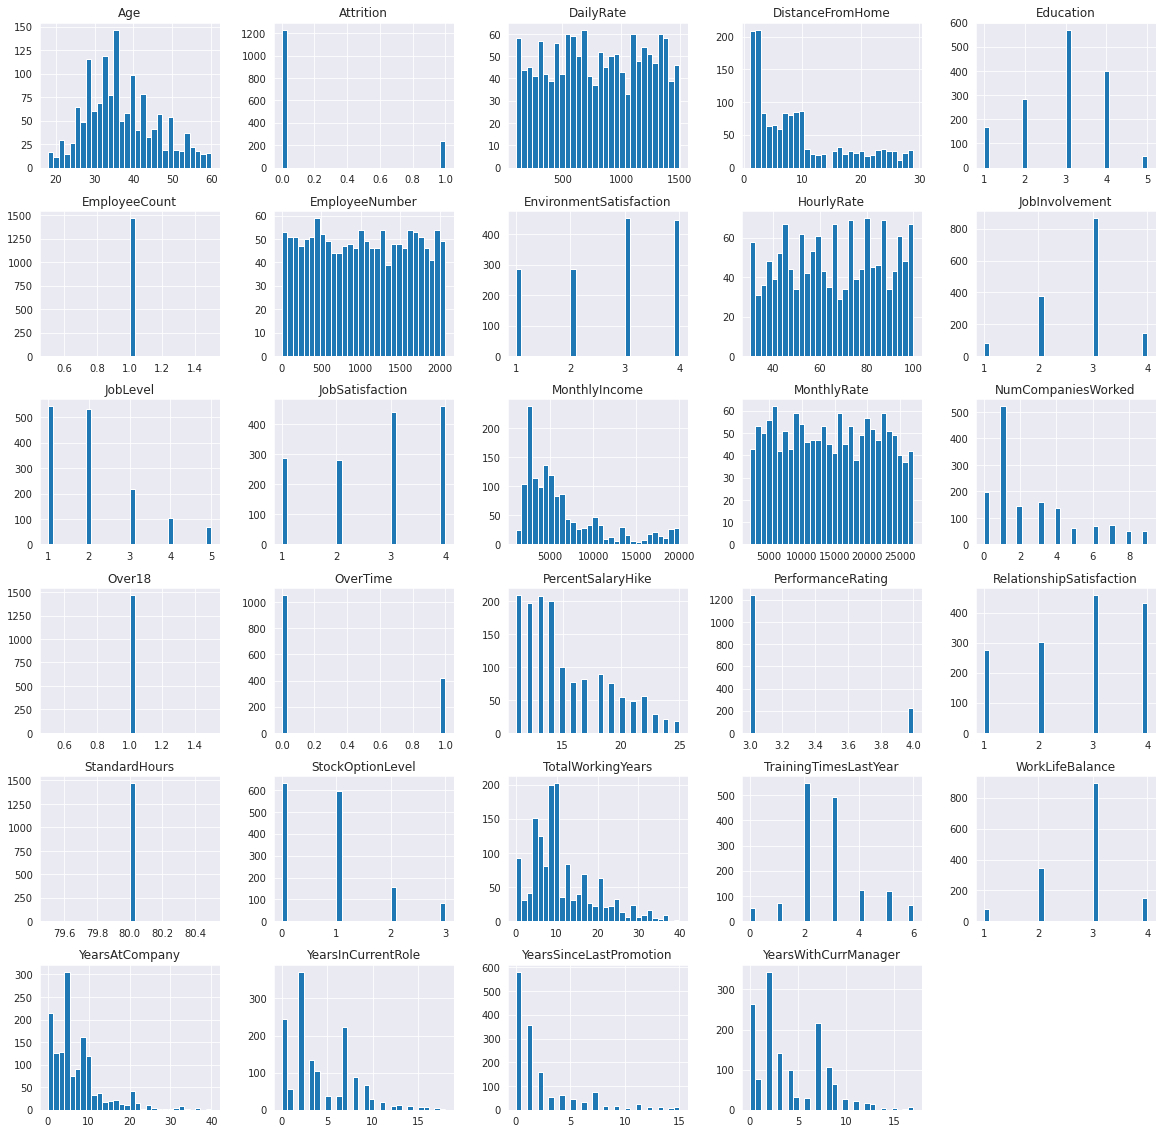

In [126]:
employee_df.hist(bins=30,figsize=(20,20));


Observations :

StandardHours, EmployeeCount, Over18 all take one value.
EmployeeNumber is an ID.
We drop them

In [127]:
employee_df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis='columns',inplace=True)


In [128]:
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [129]:
left_df = employee_df.query('Attrition == 1')
stayed_df = employee_df.query('Attrition == 0')

In [130]:
left_df.describe()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [131]:
stayed_df.describe()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


**Correlation Analysis** 



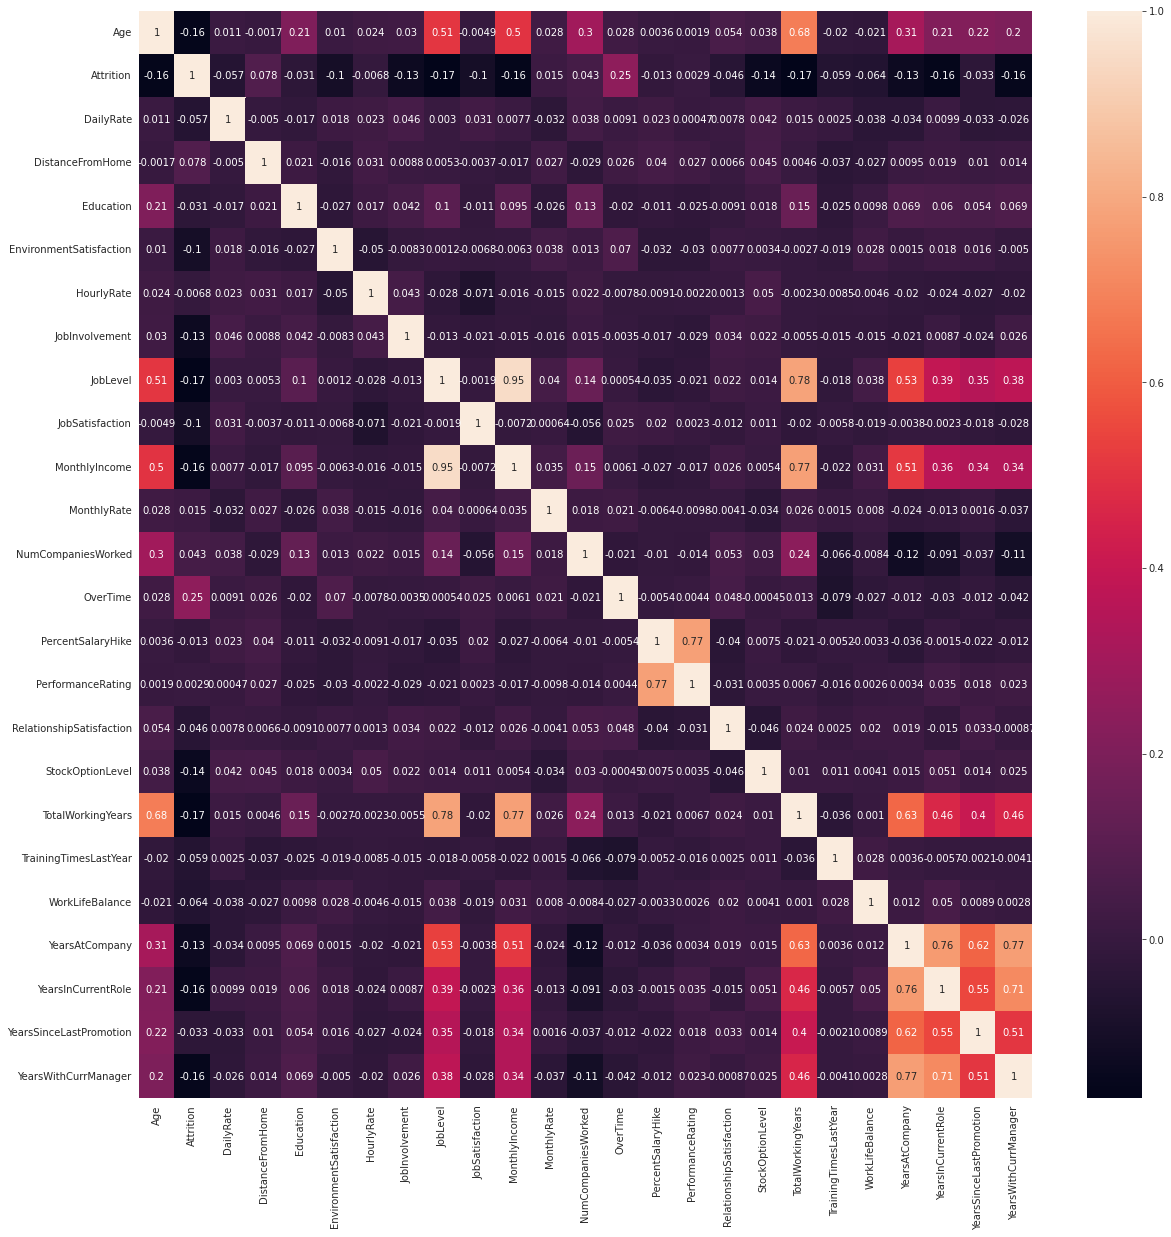

In [132]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(employee_df.corr(),annot=True)

Observations :

The most obvious correlation is the MonthlyIncomeand JobLevel.
MonthlyIncome and ToalWorkingYears are highly correlated as expected.
JobLevel alos is correlated with the TotalWorkingYears
PercentSalaryHike and PerformanceRating are correlated as well,thanks to the performance based reward system put inplace.


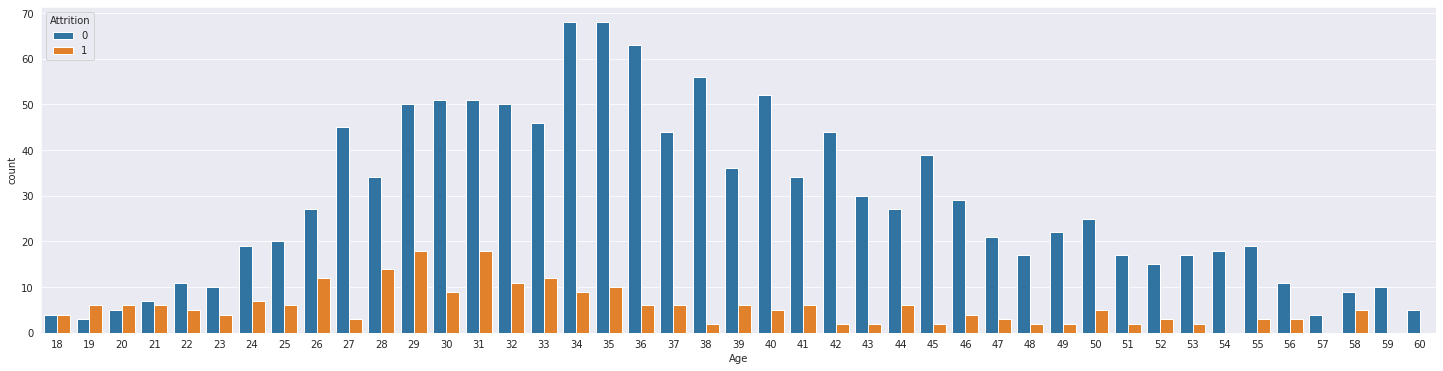

In [133]:
plt.figure(figsize=(25,6))
sns.countplot(x='Age',hue='Attrition',data=employee_df)

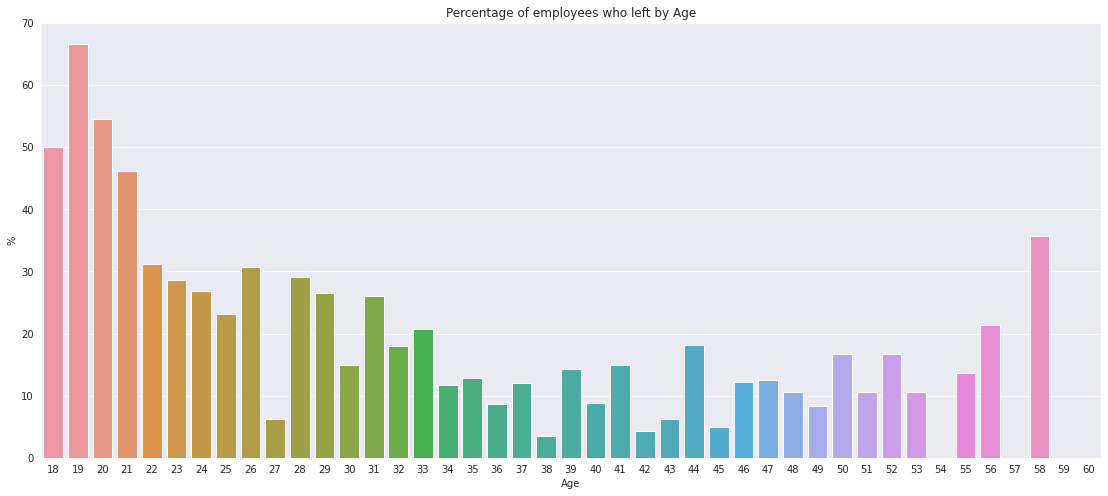

In [134]:
column='Age'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
plt.figure(figsize=(19,8))
sns.barplot(x=column,y='left_percent',data=df)
plt.title(f'Percentage of employees who left by {column}')
plt.ylabel('%');

Observations :

We can see that employees of age less than 22 are the most likely to leave. Why? : 1- They might be just interns or 2- younger people have less financial constraints (debt, family, mortgages...).
Employees are not likely leave at age 27, 54, 42, 45 and 57. Why?

In [135]:
employee_df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

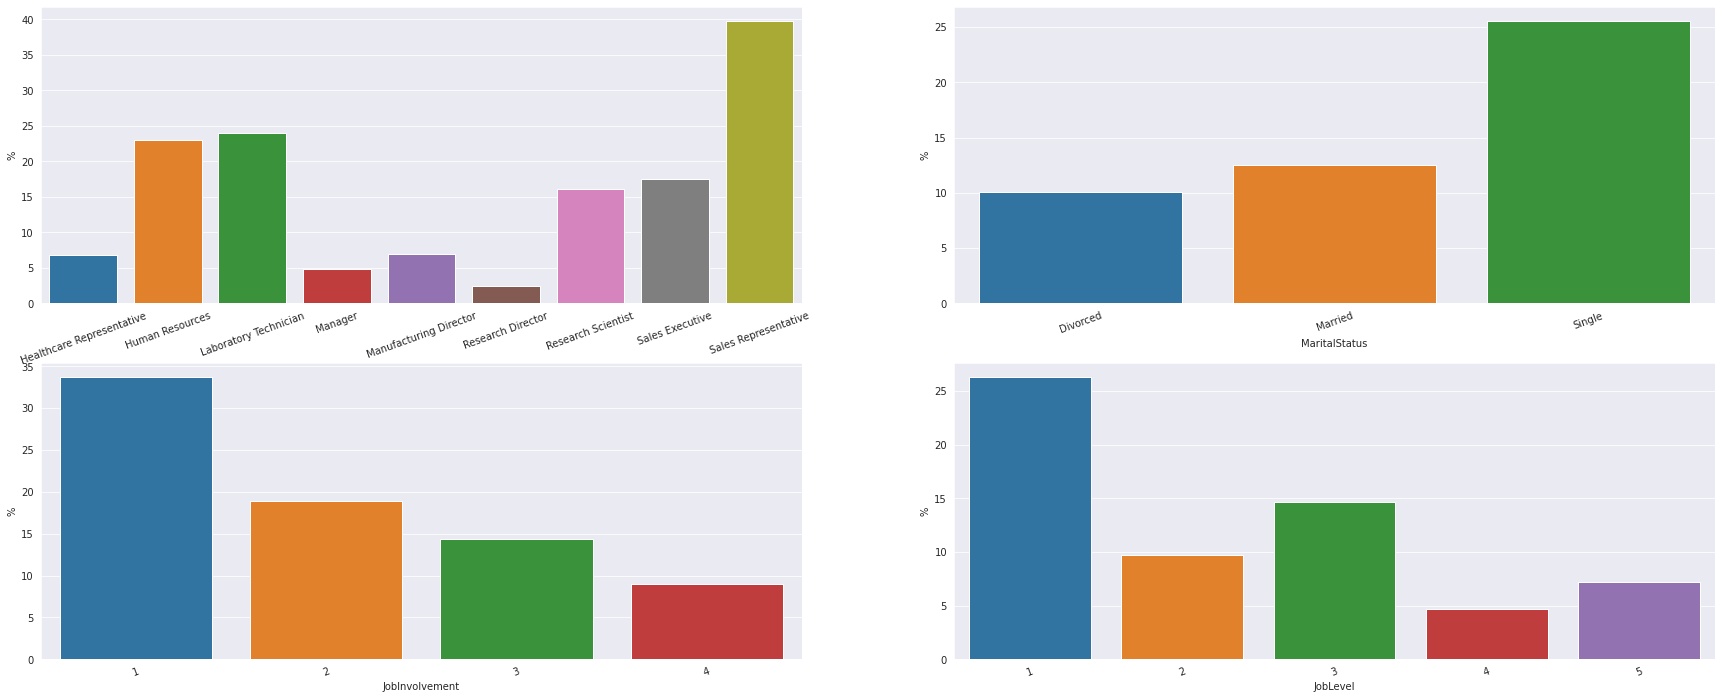

In [136]:
sns.set_style("darkgrid")

fig, axes= plt.subplots(nrows=2,ncols=2,figsize=(30,12))
column='JobRole'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
#plt.figure(figsize=(19,8))
ax=axes[0,0]
sns.barplot(ax=ax, x=column,y='left_percent',data=df)
ax.set_ylabel('%')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20);


column='MaritalStatus'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
#plt.figure(figsize=(19,8))
ax=axes[0,1]
sns.barplot(ax=ax, x=column,y='left_percent',data=df)
ax.set_ylabel('%')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20);

column='JobLevel'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
#plt.figure(figsize=(19,8))
ax=axes[1,1]
sns.barplot(ax=ax, x=column,y='left_percent',data=df)
ax.set_ylabel('%')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20);

column='JobInvolvement'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
#plt.figure(figsize=(19,8))
ax=axes[1,0]
sns.barplot(ax=ax, x=column,y='left_percent',data=df)
ax.set_ylabel('%')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20);

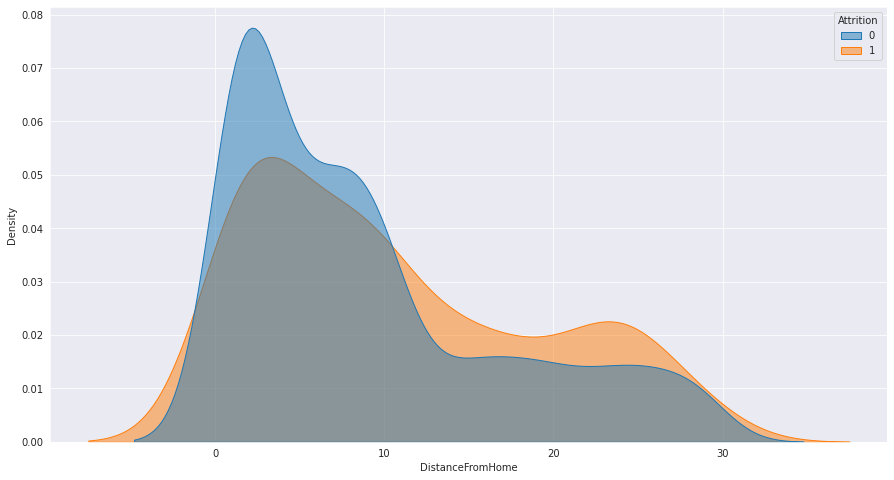

In [137]:
plt.figure(figsize=(15,8))
sns.kdeplot(
   data=employee_df, x="DistanceFromHome", hue="Attrition",
   fill=True, common_norm=False,
   alpha=.5, linewidth=1,
)

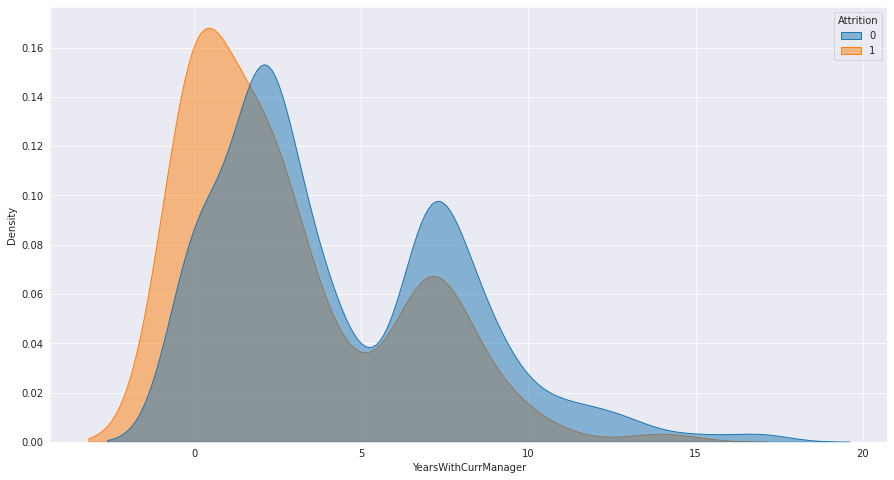

In [138]:
plt.figure(figsize=(15,8))
sns.kdeplot(
   data=employee_df, x="YearsWithCurrManager", hue="Attrition",
   fill=True, common_norm=False,
   alpha=.5, linewidth=1,
)

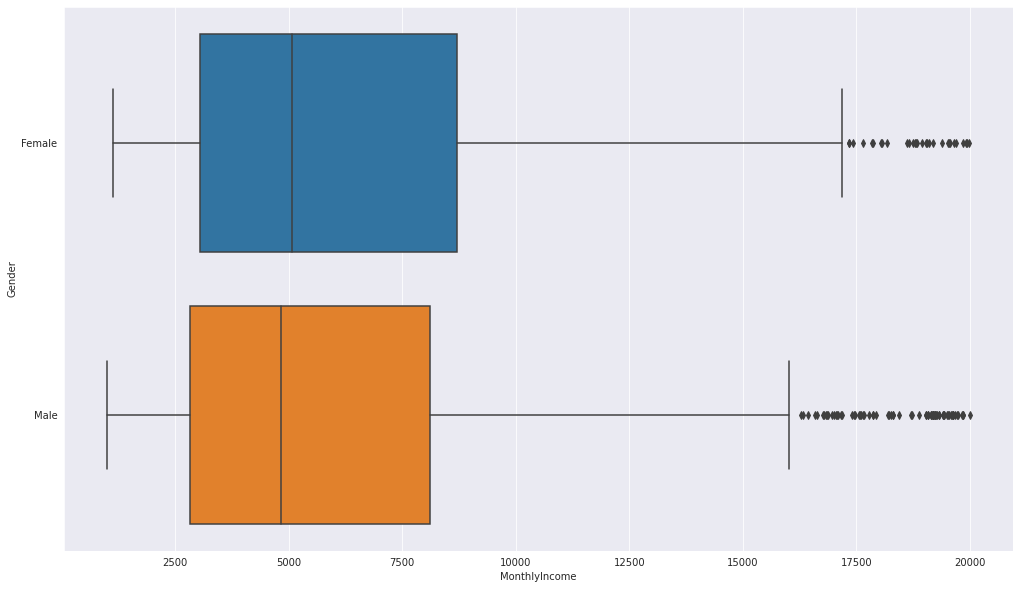

In [139]:
plt.figure(figsize=(17,10))
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df)

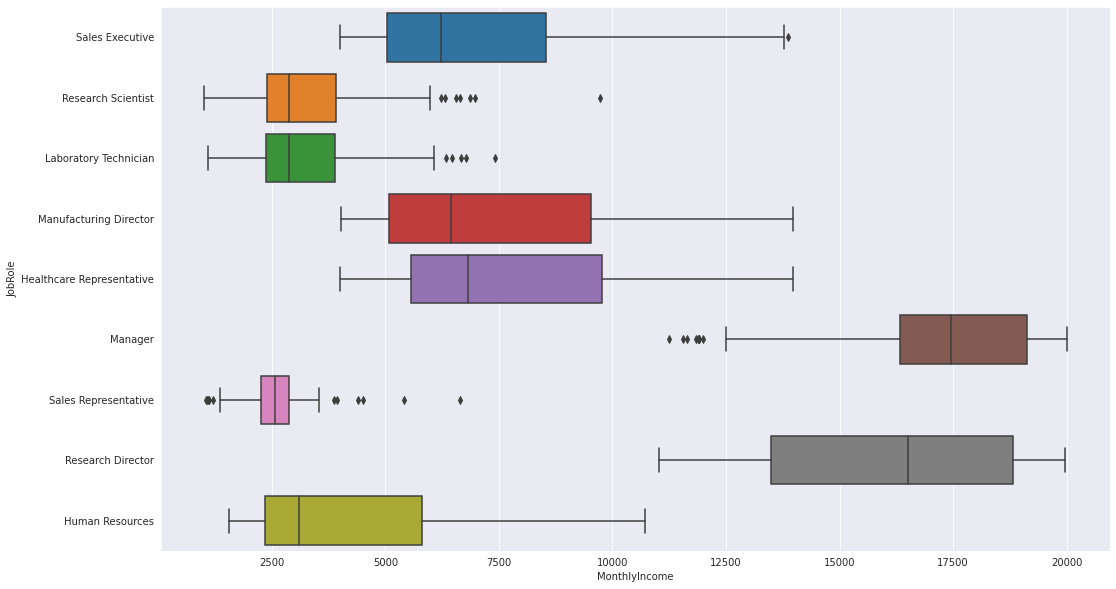

In [140]:
plt.figure(figsize=(17,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)

**PreProcessing categorical features **

In [141]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [142]:
categoricals=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']

In [143]:
X_cat= employee_df[categoricals]

In [144]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [145]:
from sklearn.preprocessing import OneHotEncoder

In [146]:
onehotencoder=OneHotEncoder()
X_cat=onehotencoder.fit_transform(X_cat).toarray() 
X_cat= pd.DataFrame(X_cat)

In [147]:
X_numer=employee_df.drop(categoricals+['Attrition'],axis='columns')

In [148]:
X_all= pd.concat([ X_cat, X_numer],axis=1)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_all,employee_df['Attrition'],test_size= 0.25)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

In [150]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [151]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
X_val= pd.DataFrame(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [152]:
X_train.shape

(1102, 50)

In [153]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=110,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))

model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Dense(units=20,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

Epoch 1/50
5/5 [==============================] - 1s 48ms/step - loss: 0.6929 - accuracy: 0.6969 - val_loss: 0.6463 - val_accuracy: 0.7826
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6101 - accuracy: 0.8312 - val_loss: 0.6018 - val_accuracy: 0.7826
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5513 - accuracy: 0.8430 - val_loss: 0.5802 - val_accuracy: 0.7826
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5193 - accuracy: 0.8457 - val_loss: 0.5764 - val_accuracy: 0.7826
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.5121 - accuracy: 0.8466 - val_loss: 0.5784 - val_accuracy: 0.7826
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 0.5063 - accuracy: 0.8466 - val_loss: 0.5756 - val_accuracy: 0.7826
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5024 - accuracy: 0.8466 - val_loss: 0.5676 - val_accuracy: 0.7826
Epoch 8/50
5/5 [================

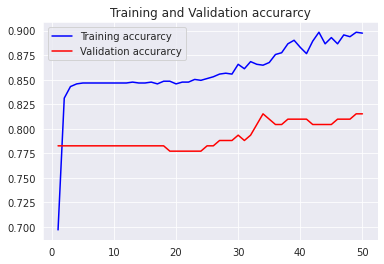

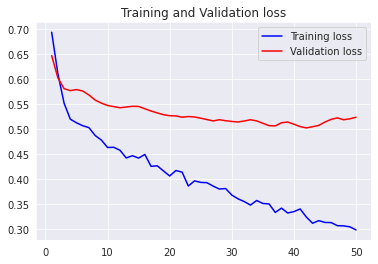

In [154]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [155]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 20)                1020      
                                                                 
 dropout_79 (Dropout)        (None, 20)                0         
                                                                 
 dense_105 (Dense)           (None, 110)               2310      
                                                                 
 dropout_80 (Dropout)        (None, 110)               0         
                                                                 
 dense_106 (Dense)           (None, 20)                2220      
                                                                 
 dropout_81 (Dropout)        (None, 20)                0         
                                                                 
 dense_107 (Dense)           (None, 1)               

In [156]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c0=classification_report(y_test,y_pred)
print(c0)

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       156
           1       0.62      0.36      0.45        28

    accuracy                           0.87       184
   macro avg       0.76      0.66      0.69       184
weighted avg       0.85      0.87      0.85       184



**Class imbalance problem**

**1. Add class weights**

In [157]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.5905680600214362, 1: 3.260355029585799}

In [162]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=110,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))

model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Dense(units=20,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val),class_weight=class_weights)

Epoch 1/50
5/5 [==============================] - 1s 49ms/step - loss: 0.8034 - accuracy: 0.2822 - val_loss: 0.7656 - val_accuracy: 0.5109
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7673 - accuracy: 0.5499 - val_loss: 0.7072 - val_accuracy: 0.7011
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7567 - accuracy: 0.6243 - val_loss: 0.7061 - val_accuracy: 0.7283
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7382 - accuracy: 0.6225 - val_loss: 0.7162 - val_accuracy: 0.6902
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7245 - accuracy: 0.6007 - val_loss: 0.7186 - val_accuracy: 0.6630
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7266 - accuracy: 0.6071 - val_loss: 0.7181 - val_accuracy: 0.6630
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 0.7098 - accuracy: 0.6071 - val_loss: 0.7150 - val_accuracy: 0.6576
Epoch 8/50
5/5 [=================

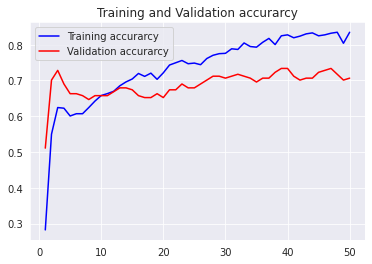

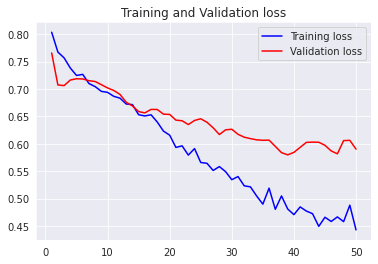

In [163]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [164]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 20)                1020      
                                                                 
 dropout_85 (Dropout)        (None, 20)                0         
                                                                 
 dense_113 (Dense)           (None, 110)               2310      
                                                                 
 dropout_86 (Dropout)        (None, 110)               0         
                                                                 
 dense_114 (Dense)           (None, 20)                2220      
                                                                 
 dropout_87 (Dropout)        (None, 20)                0         
                                                                 
 dense_115 (Dense)           (None, 1)               

In [165]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       156
           1       0.36      0.57      0.44        28

    accuracy                           0.78       184
   macro avg       0.63      0.69      0.65       184
weighted avg       0.83      0.78      0.80       184



**2. SMOTE**

In [170]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 933, 1: 933})


In [171]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=110,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))

model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=20,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_res,y_res,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

Epoch 1/50
8/8 [==============================] - 1s 32ms/step - loss: 0.7665 - accuracy: 0.5284 - val_loss: 0.7342 - val_accuracy: 0.5272
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.7261 - accuracy: 0.5750 - val_loss: 0.7147 - val_accuracy: 0.5380
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6947 - accuracy: 0.6409 - val_loss: 0.7047 - val_accuracy: 0.5652
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6650 - accuracy: 0.6710 - val_loss: 0.6871 - val_accuracy: 0.5924
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6433 - accuracy: 0.6908 - val_loss: 0.6910 - val_accuracy: 0.6141
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6150 - accuracy: 0.7192 - val_loss: 0.7036 - val_accuracy: 0.5978
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6073 - accuracy: 0.7213 - val_loss: 0.6867 - val_accuracy: 0.6359
Epoch 8/50
8/8 [=================

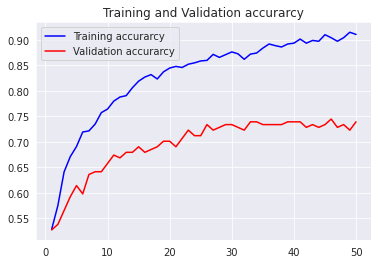

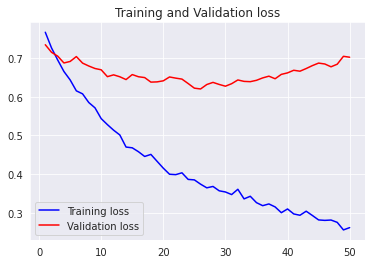

In [172]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [173]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       156
           1       0.41      0.61      0.49        28

    accuracy                           0.81       184
   macro avg       0.67      0.73      0.69       184
weighted avg       0.85      0.81      0.82       184



**3. SMOTEN**

In [174]:
from collections import Counter
from imblearn.over_sampling import SMOTEN
sm = SMOTEN(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=110,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))

model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=20,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_res,y_res,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

Resampled dataset shape Counter({0: 933, 1: 933})
Epoch 1/50
8/8 [==============================] - 1s 43ms/step - loss: 0.7093 - accuracy: 0.6308 - val_loss: 0.6904 - val_accuracy: 0.6250
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6332 - accuracy: 0.7481 - val_loss: 0.6571 - val_accuracy: 0.6793
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5727 - accuracy: 0.7781 - val_loss: 0.6365 - val_accuracy: 0.7011
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5089 - accuracy: 0.8156 - val_loss: 0.6306 - val_accuracy: 0.7174
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4657 - accuracy: 0.8344 - val_loss: 0.6330 - val_accuracy: 0.7174
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4382 - accuracy: 0.8446 - val_loss: 0.6157 - val_accuracy: 0.7228
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 0.4068 - accuracy: 0.8617 - val_loss: 0.6083 - va

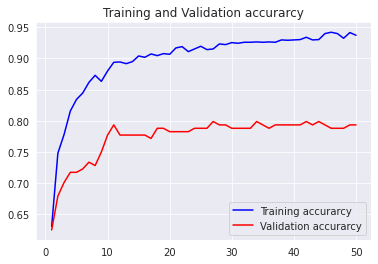

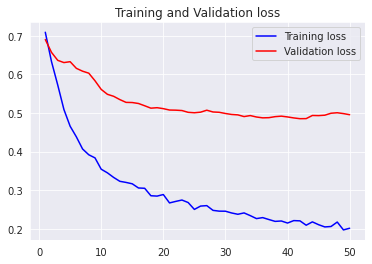

In [175]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [176]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       156
           1       0.45      0.36      0.40        28

    accuracy                           0.84       184
   macro avg       0.67      0.64      0.65       184
weighted avg       0.82      0.84      0.83       184



**3. ADASYN**

In [177]:
from collections import Counter
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=110,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))

model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=20,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_res,y_res,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

Resampled dataset shape Counter({1: 940, 0: 933})
Epoch 1/50
8/8 [==============================] - 1s 45ms/step - loss: 0.7788 - accuracy: 0.5125 - val_loss: 0.7221 - val_accuracy: 0.6141
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7393 - accuracy: 0.5585 - val_loss: 0.6898 - val_accuracy: 0.6902
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.7227 - accuracy: 0.5713 - val_loss: 0.6862 - val_accuracy: 0.6957
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7006 - accuracy: 0.6364 - val_loss: 0.6779 - val_accuracy: 0.7011
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6754 - accuracy: 0.6647 - val_loss: 0.6624 - val_accuracy: 0.6902
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6497 - accuracy: 0.6855 - val_loss: 0.6570 - val_accuracy: 0.6793
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6222 - accuracy: 0.7010 - val_loss: 0.6405 - va

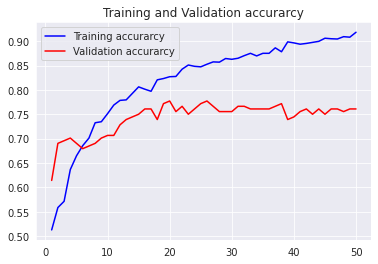

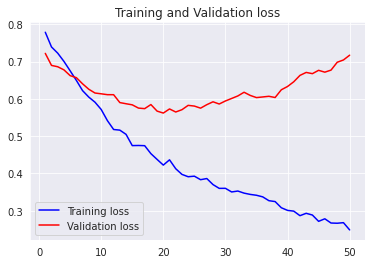

In [178]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [179]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       156
           1       0.49      0.64      0.55        28

    accuracy                           0.84       184
   macro avg       0.71      0.76      0.73       184
weighted avg       0.86      0.84      0.85       184



**4. Borderline smote**

In [180]:
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=110,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))

model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=20,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_res,y_res,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

Resampled dataset shape Counter({0: 933, 1: 933})
Epoch 1/50
8/8 [==============================] - 2s 76ms/step - loss: 0.7853 - accuracy: 0.5423 - val_loss: 0.7400 - val_accuracy: 0.5380
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.6988 - accuracy: 0.6334 - val_loss: 0.7984 - val_accuracy: 0.4620
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 0.6788 - accuracy: 0.6533 - val_loss: 0.7543 - val_accuracy: 0.5870
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.6346 - accuracy: 0.6988 - val_loss: 0.6998 - val_accuracy: 0.6250
Epoch 5/50
8/8 [==============================] - 0s 17ms/step - loss: 0.6027 - accuracy: 0.7245 - val_loss: 0.6927 - val_accuracy: 0.6141
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5843 - accuracy: 0.7353 - val_loss: 0.7090 - val_accuracy: 0.6196
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.5789 - accuracy: 0.7481 - val_loss: 0.7040 -

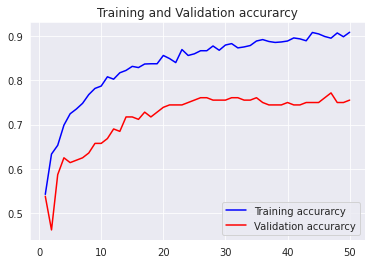

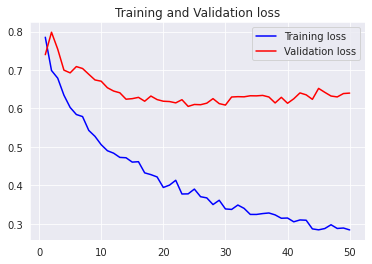

In [181]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [182]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       156
           1       0.33      0.57      0.42        28

    accuracy                           0.76       184
   macro avg       0.62      0.68      0.64       184
weighted avg       0.82      0.76      0.78       184



**5. SVMSMOTE**

In [184]:
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=110,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))

model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=20,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_res,y_res,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

Resampled dataset shape Counter({0: 933, 1: 933})
Epoch 1/50
8/8 [==============================] - 1s 26ms/step - loss: 0.8089 - accuracy: 0.5236 - val_loss: 0.7895 - val_accuracy: 0.3967
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.7138 - accuracy: 0.6061 - val_loss: 0.6954 - val_accuracy: 0.6630
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6748 - accuracy: 0.6618 - val_loss: 0.6707 - val_accuracy: 0.6630
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6282 - accuracy: 0.7213 - val_loss: 0.6605 - val_accuracy: 0.6467
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5992 - accuracy: 0.7192 - val_loss: 0.6520 - val_accuracy: 0.6630
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5644 - accuracy: 0.7519 - val_loss: 0.6354 - val_accuracy: 0.6957
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5293 - accuracy: 0.7594 - val_loss: 0.6176 - val_

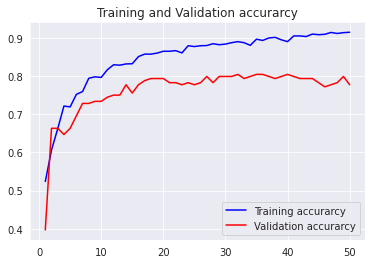

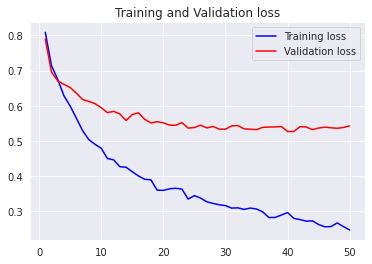

In [185]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [186]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       156
           1       0.51      0.68      0.58        28

    accuracy                           0.85       184
   macro avg       0.73      0.78      0.75       184
weighted avg       0.87      0.85      0.86       184



In [187]:
from collections import Counter
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=110,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))

model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=20,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_res,y_res,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

Resampled dataset shape Counter({1: 908, 0: 493})
Epoch 1/50
6/6 [==============================] - 2s 61ms/step - loss: 0.8213 - accuracy: 0.4504 - val_loss: 0.7888 - val_accuracy: 0.3750
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 0.7218 - accuracy: 0.5960 - val_loss: 0.9233 - val_accuracy: 0.2391
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 0.6848 - accuracy: 0.6574 - val_loss: 0.9663 - val_accuracy: 0.2663
Epoch 4/50
6/6 [==============================] - 0s 14ms/step - loss: 0.6552 - accuracy: 0.6724 - val_loss: 0.9504 - val_accuracy: 0.3315
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.6228 - accuracy: 0.7045 - val_loss: 0.9271 - val_accuracy: 0.3696
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6072 - accuracy: 0.7116 - val_loss: 0.9227 - val_accuracy: 0.4239
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.5683 - accuracy: 0.7466 - val_loss: 0.9260 

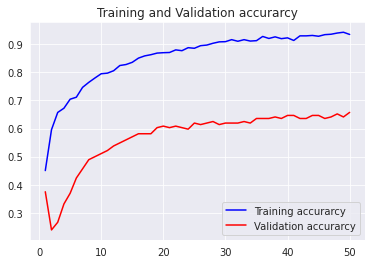

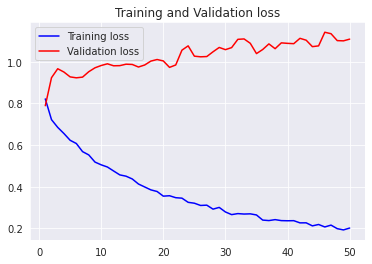

In [188]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [189]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       156
           1       0.34      0.79      0.47        28

    accuracy                           0.73       184
   macro avg       0.64      0.76      0.65       184
weighted avg       0.86      0.73      0.77       184



In [190]:
from collections import Counter
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=110,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))

model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=20,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_res,y_res,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

Resampled dataset shape Counter({0: 933, 1: 933})
Epoch 1/50
8/8 [==============================] - 3s 50ms/step - loss: 0.7521 - accuracy: 0.5413 - val_loss: 0.7158 - val_accuracy: 0.6359
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.7094 - accuracy: 0.6222 - val_loss: 0.6966 - val_accuracy: 0.6630
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6753 - accuracy: 0.6758 - val_loss: 0.6762 - val_accuracy: 0.6576
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6475 - accuracy: 0.6892 - val_loss: 0.6600 - val_accuracy: 0.6630
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6163 - accuracy: 0.7315 - val_loss: 0.6720 - val_accuracy: 0.6630
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5981 - accuracy: 0.7390 - val_loss: 0.6746 - val_accuracy: 0.6685
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5831 - accuracy: 0.7508 - val_loss: 0.6447 - val

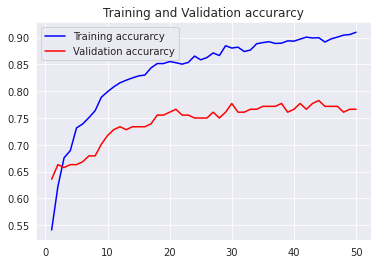

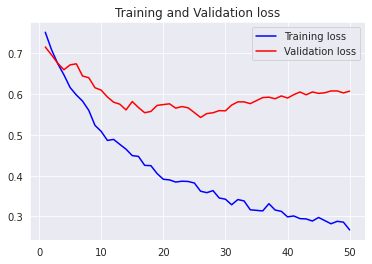

In [192]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [193]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       156
           1       0.42      0.61      0.50        28

    accuracy                           0.82       184
   macro avg       0.67      0.73      0.69       184
weighted avg       0.85      0.82      0.83       184



In [194]:
from imblearn.ensemble import RUSBoostClassifier
clf = RUSBoostClassifier( random_state=0)
clf.fit(X_train, y_train)

RUSBoostClassifier(random_state=0)

In [195]:
y_pred= clf.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       156
           1       0.30      0.61      0.40        28

    accuracy                           0.73       184
   macro avg       0.61      0.68      0.61       184
weighted avg       0.82      0.73      0.76       184



In [74]:
initial_bias = np.log([173/929])
output_bias = tf.keras.initializers.Constant(initial_bias)

In [94]:
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 933, 1: 933})


In [105]:
model1= tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model1.add(tf.keras.layers.Dropout(0.2))

model1.add(tf.keras.layers.Dense(units=110,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))

model1.add(tf.keras.layers.Dropout(0.2))



model1.add(tf.keras.layers.Dense(units=20,activation='relu'))
model1.add(tf.keras.layers.Dropout(0.2))

model1.add(tf.keras.layers.Dense(units=1,activation='sigmoid',bias_initializer=output_bias))

model1.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model1.fit(X_res,y_res,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

Epoch 1/50
8/8 [==============================] - 1s 46ms/step - loss: 1.0427 - accuracy: 0.5000 - val_loss: 0.5689 - val_accuracy: 0.7826
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8245 - accuracy: 0.5241 - val_loss: 0.6108 - val_accuracy: 0.7663
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.7110 - accuracy: 0.6168 - val_loss: 0.6899 - val_accuracy: 0.6685
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6737 - accuracy: 0.6565 - val_loss: 0.6737 - val_accuracy: 0.6413
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6104 - accuracy: 0.7160 - val_loss: 0.6320 - val_accuracy: 0.6793
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5771 - accuracy: 0.7320 - val_loss: 0.6137 - val_accuracy: 0.7120
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5609 - accuracy: 0.7374 - val_loss: 0.6125 - val_accuracy: 0.7120
Epoch 8/50
8/8 [=================

In [106]:
y_pred= model1.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       156
           1       0.61      0.68      0.64        28

    accuracy                           0.89       184
   macro avg       0.78      0.80      0.79       184
weighted avg       0.89      0.89      0.89       184

